<a href="https://colab.research.google.com/github/vijaykumarharakuni/Deeplearning/blob/main/LoanDefaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('loan_data.csv')

In [5]:
data.shape

(9578, 14)

In [6]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


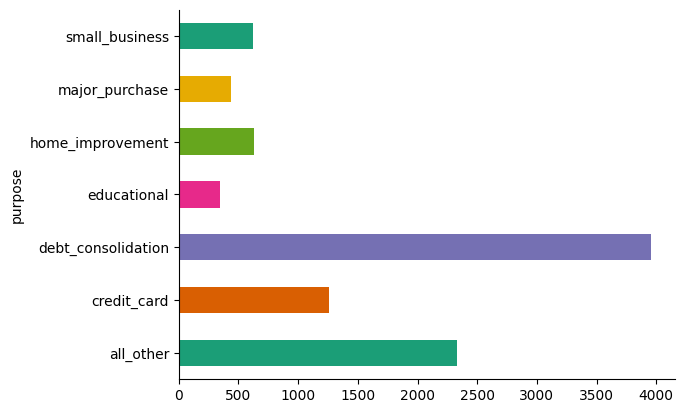

In [8]:
# @title purpose

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-7-d97214f3eab0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='log.annual.inc', y='purpose', inner='box', palette='Dark2')


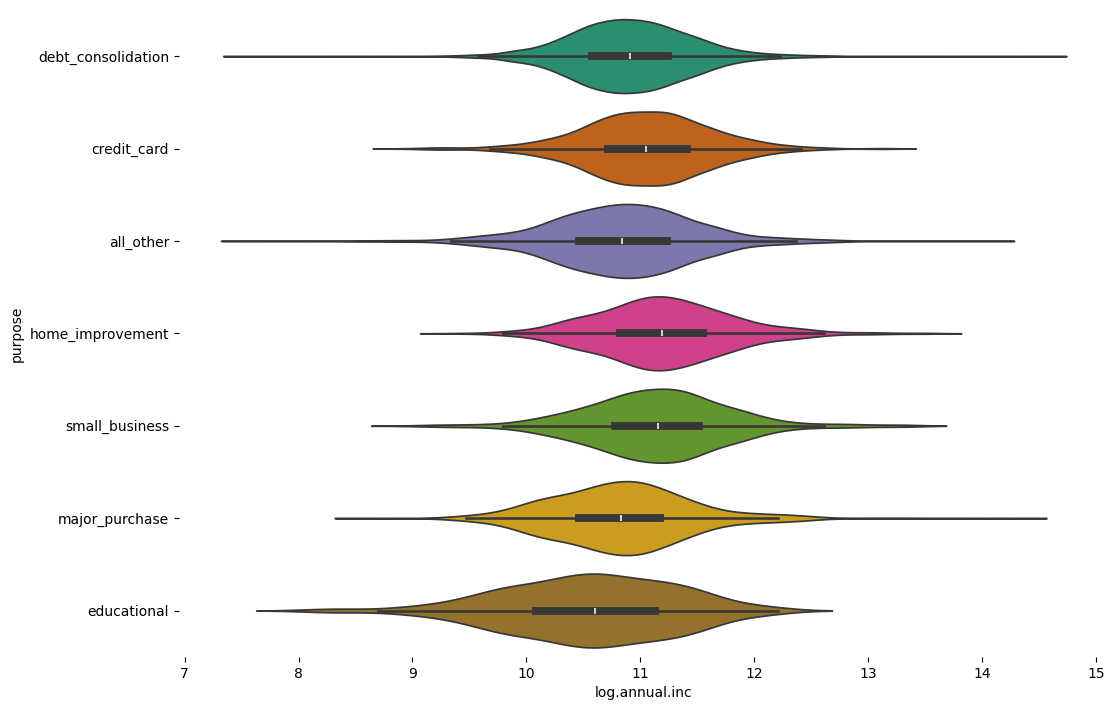

In [7]:
# @title purpose vs log.annual.inc

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['purpose'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='log.annual.inc', y='purpose', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
data.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [11]:
data['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


<Axes: >

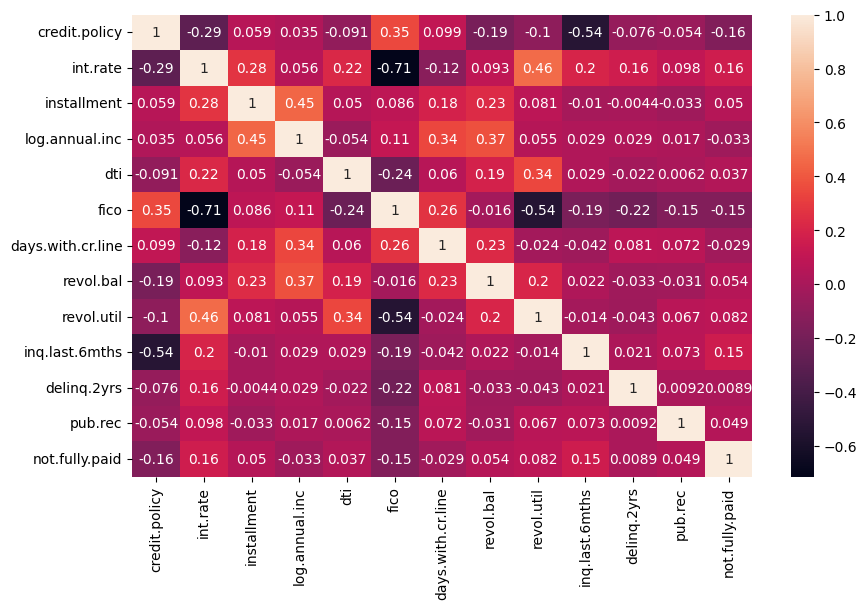

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [13]:
#Handle Imbalance data
no_fully_paid_0=data[data['not.fully.paid']==0]
no_fully_paid_1=data[data['not.fully.paid']==1]

In [14]:
print(no_fully_paid_0.shape)
print(no_fully_paid_1.shape)

(8045, 14)
(1533, 14)


In [16]:
#resample oversampling
from sklearn.utils import resample
no_fully_paid_1_upsampled=resample(no_fully_paid_1, replace=True,n_samples=len(no_fully_paid_0),random_state=42)
new_df=pd.concat([no_fully_paid_0,no_fully_paid_1_upsampled])
new_df['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,8045


In [17]:
# shuffle the data
from sklearn.utils import shuffle
new_df=shuffle(new_df)
new_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7936,0,educational,0.1122,82.11,10.308953,0.40,672,1590.000000,174,9.2,7,1,0,0
3837,1,educational,0.1253,167.34,10.308953,0.00,697,1860.000000,0,0.0,1,1,0,1
2794,1,educational,0.1474,172.69,10.950807,9.81,687,6120.000000,3335,45.1,2,0,0,1
6277,1,all_other,0.1496,173.23,10.308953,24.40,662,2880.000000,1451,46.8,0,1,0,1
4943,1,small_business,0.1531,278.53,10.915088,19.66,752,3239.958333,39644,10.3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,1,debt_consolidation,0.0800,188.02,10.703244,6.44,752,5340.000000,5970,12.7,1,0,0,0
5761,1,debt_consolidation,0.1322,84.51,10.352108,14.56,727,8160.041667,17806,99.4,0,0,0,1
3449,1,all_other,0.1411,111.25,10.043249,23.65,677,3510.000000,545,90.8,2,0,2,0
633,1,debt_consolidation,0.1197,351.92,10.572547,14.90,682,2579.000000,7583,80.7,0,0,0,1


In [18]:
# apply label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df['purpose']=le.fit_transform(new_df['purpose'])



<Axes: >

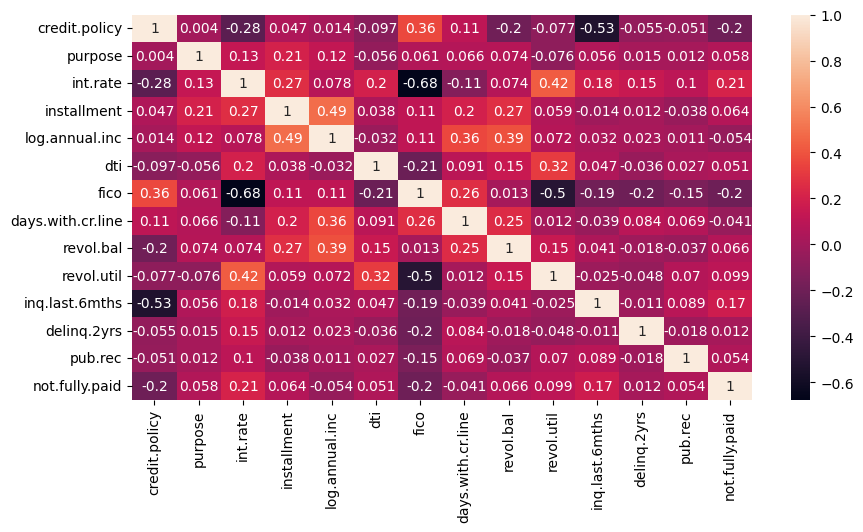

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(new_df.corr(numeric_only=True),annot=True)

In [20]:
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

,not.fully.paid
not.fully.paid,1.000000
int.rate,0.213552
fico,0.203238
credit.policy,0.200468
inq.last.6mths,0.174053
revol.util,0.099415
revol.bal,0.065912
installment,0.064470
purpose,0.057662
pub.rec,0.054455


In [21]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [22]:
X=new_df[['credit.policy', 'purpose', 'int.rate', 'installment', 'fico','revol.util',
       'inq.last.6mths',  'pub.rec']]

In [23]:
X.shape

(16090, 8)

In [24]:
y=new_df[['not.fully.paid']]

In [25]:
# create splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [26]:
# Apply std scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Create ANN Using Kera & tf

1.Create Architeture

*   How to handle Overfitting -Regularization (select right feature)
*   Vanishing Gradient
*   Batch Normalization
*   List item



  

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
# l2 regularizer
from tensorflow.keras.regularizers import l2
print('imported')

imported


In [30]:
model=Sequential()
#add first hidden layer
model.add(Dense(units=19,activation='relu',kernel_regularizer=l2(0.001),input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#add second hidden layer
model.add(Dense(units=15,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#add third hidden layer
model.add(Dense(units=10,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#add output layer
model.add(Dense(units=1,activation='sigmoid'))
print('model created')

model created


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 19)                  │             171 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 19)                  │              76 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15)                  │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 818 (3.20 KB)

 Trainable params: 730 (2.85 KB)

 Non-trainable params: 88 (352.00 B)

In [32]:
#model compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print('model compiled')

model compiled


#GPU,over the epoch, accurnace must increase and losses must dec
Monitor performance over the epochs ,model callbacks


In [48]:
#early stopping
#import library 128 batch size that's why 101
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.01)

#Model Checkpoint -Saves the best model

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',verbose=1,save_best_only=True)


In [49]:
history=model.fit(X_train,y_train,
                  epochs=50,batch_size=128,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stop,checkpoint])

Epoch 1/50
 89/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - loss: 0.6321
Epoch 1: val_loss improved from inf to 0.62757, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6512 - loss: 0.6327 - val_accuracy: 0.6516 - val_loss: 0.6276
Epoch 2/50
 97/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6462 - loss: 0.6359
Epoch 2: val_loss did not improve from 0.62757
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6461 - loss: 0.6357 - val_accuracy: 0.6513 - val_loss: 0.6277
Epoch 3/50
 93/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6482 - loss: 0.6317
Epoch 3: val_loss did not improve from 0.62757
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6481 - loss: 0.6319 - val_accuracy: 0.6495 - val_loss: 0.6295
Epoch 4/50
 98/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6429 - loss: 0.6358
Epoch 4: val_loss did not improve from 0.62757
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6429 - loss: 0.6357 - val_accuracy: 0.6426 - val_loss: 0.6277
Epoch 5/50
 92/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6392 - loss: 0.6345
Epoch 5: val_loss did not improve from 0.62757


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6488 - loss: 0.6327 - val_accuracy: 0.6520 - val_loss: 0.6252
Epoch 7/50
 96/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6498 - loss: 0.6322
Epoch 7: val_loss did not improve from 0.62522
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6495 - loss: 0.6324 - val_accuracy: 0.6526 - val_loss: 0.6284
Epoch 8/50
 95/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6425 - loss: 0.6381
Epoch 8: val_loss did not improve from 0.62522
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6427 - loss: 0.6379 - val_accuracy: 0.6526 - val_loss: 0.6307
Epoch 9/50
 94/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 0.6333
Epoch 9: val_loss did not improve from 0.62522
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6425 - loss: 0.6334 - val_accuracy: 0.6566 - val_loss: 0.6264
Epoch 10/50
 92/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - loss: 0.6381
Epoch 10: val_loss did not improve from 0.6252

In [50]:
#print test score
score=model.evaluate(X_test,y_test)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - loss: 0.6222
Test loss: 0.6276063323020935
Test accuracy: 0.6528899669647217


In [51]:
#print training score
score=model.evaluate(X_train,y_train)
print('Train loss:',score[0])
print('Train accuracy:',score[1])

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6643 - loss: 0.6151
Train loss: 0.6178632378578186
Train accuracy: 0.6643878221511841


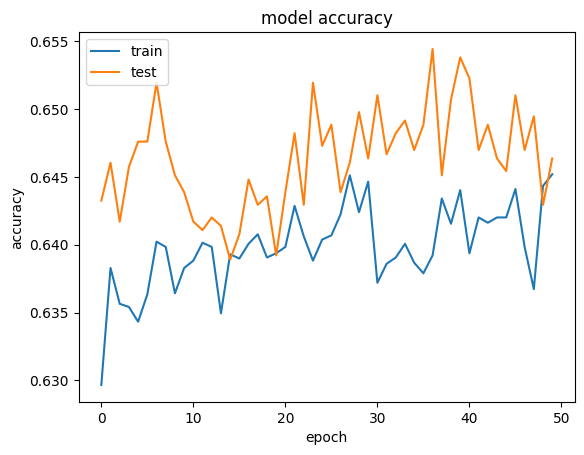

In [42]:
# print accuracy graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

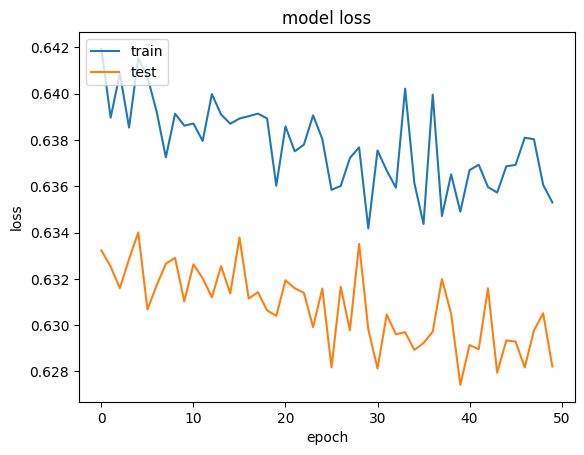

In [43]:
# loss grpah
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()